In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv('/content/oasis_longitudinal.csv')


In [3]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
data.dropna(subset=['SES','MMSE'],inplace=True)

In [8]:
data.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
data.shape

(354, 15)

In [10]:
data['M/F']=data['M/F'].map({'M':0,'F':1})

data['Group']=data['Group'].map({'Notdemented':0,'Demented':1,'Converted':2})

<function matplotlib.pyplot.show(close=None, block=None)>

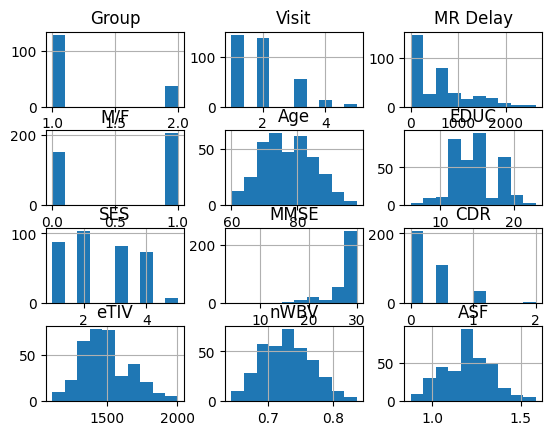

In [11]:
data.hist()
plt.show

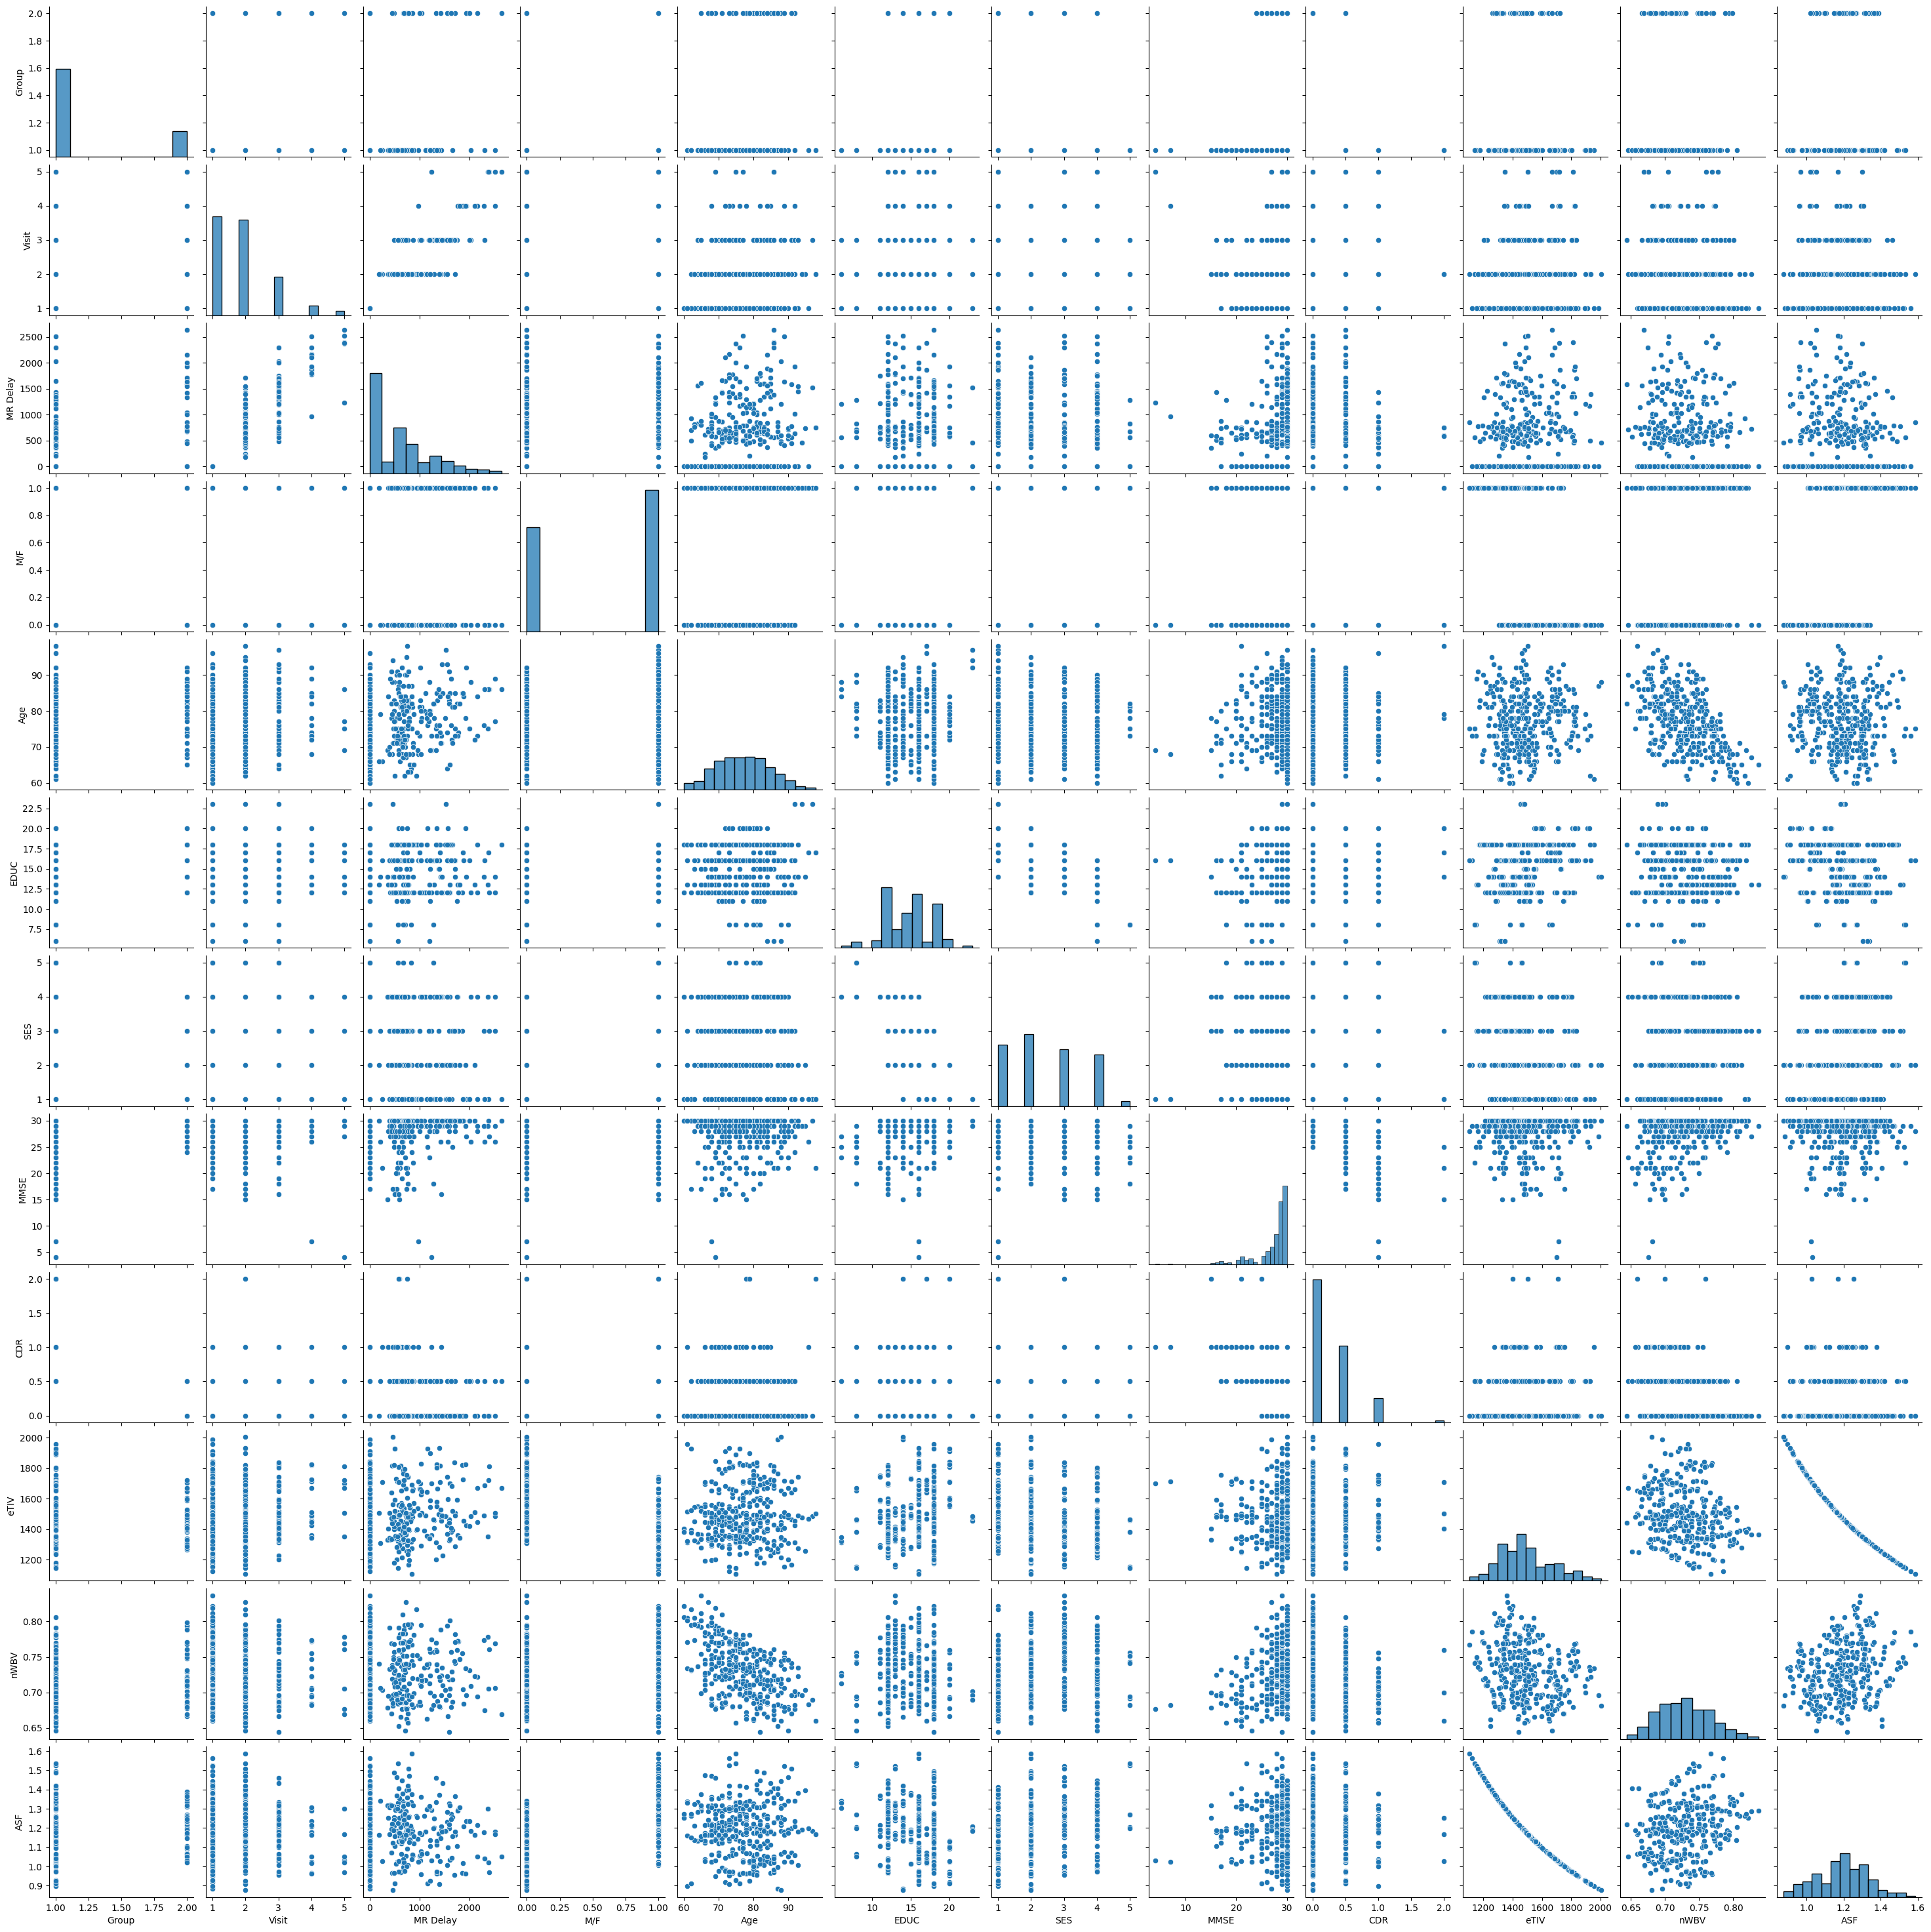

In [12]:
sb.pairplot(data)
plt.show()

In [13]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [14]:
data['Group'].unique()

array([nan,  1.,  2.])

In [15]:
data['Group']=data['Group'].fillna(0)

In [16]:
data['Group'].unique()

array([0., 1., 2.])

Splitting x and y values

In [17]:
x=data.drop(['Group','Subject ID','MRI ID','Hand'],axis=1)
y=data['Group']

In [18]:
x.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [19]:
y.head()

0    0.0
1    0.0
5    0.0
6    0.0
7    0.0
Name: Group, dtype: float64

Splitting data into training and testing data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [21]:
x_train

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
371,2,763,1,63,13,2.0,30.0,0.0,1327,0.796,1.323
213,2,952,1,74,18,2.0,30.0,0.0,1400,0.752,1.254
362,2,182,1,66,13,2.0,30.0,0.0,1506,0.740,1.165
190,2,680,0,75,18,2.0,29.0,0.0,1534,0.772,1.144
81,1,0,1,71,16,1.0,27.0,0.0,1289,0.771,1.362
...,...,...,...,...,...,...,...,...,...,...,...
77,2,486,1,83,18,2.0,25.0,0.5,1179,0.733,1.488
112,1,0,1,82,16,3.0,29.0,0.0,1484,0.760,1.183
282,2,846,1,75,16,2.0,28.0,0.0,1106,0.767,1.587
367,1,0,0,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((283, 11), (71, 11), (283,), (71,))

Model Selection

In [23]:
model=DecisionTreeClassifier()

Model training

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

Predicting a model

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred

array([0., 0., 2., 0., 0., 1., 0., 0., 2., 2., 1., 1., 2., 1., 2., 2., 0.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 2., 0., 1., 2., 1., 1., 1.,
       2., 1., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 2.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 2., 0., 0.,
       2., 0., 0.])

Model evaluation

In [27]:
print('accuracy score',accuracy_score(y_test,y_pred)*100)
print('confusion matrix',confusion_matrix(y_test,y_pred))
print('classification report',classification_report(y_test,y_pred))

accuracy score 76.05633802816901
confusion matrix [[31  1  5]
 [ 1 19  6]
 [ 3  1  4]]
classification report               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        37
         1.0       0.90      0.73      0.81        26
         2.0       0.27      0.50      0.35         8

    accuracy                           0.76        71
   macro avg       0.69      0.69      0.67        71
weighted avg       0.82      0.76      0.78        71



In [28]:
def prediction(features):
  pred_features=model.predict(features)
  if(pred_features==0):
    print("not suffering with alzheimer's disease")
  elif(pred_features==1):
    print("suffering with alzheimers disease")
  else:
    print('Intially not suffered but now suffering with alzheimers disease')


In [29]:
features=[[1,0,0,60,12,4.0,30.0,0.0,1379,0.806,1.273]]
prediction(features)

not suffering with alzheimer's disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
features=[[2,1212,0,79,16,1.0,29.0,0.5,1899,0.700,0.924]]
prediction(features)

suffering with alzheimers disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
features=[[1,0,0,84,16,2.0,30.0,0.0,1404,0.710,1.250]]
prediction(features)

Intially not suffered but now suffering with alzheimers disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
